***
#  2 :  Analysez des données de systèmes éducatifs 
****

### Sommaire

* [A - Définition de la mission](#chapter1)

* [B - Importation des données](#chapter2)
    * [B1 - Chargement des jeux de données](#section_2_1)
    * [B2 - Descriptif des données](#section_2_2)
* [C- Exploration](#chapter3)
* [D - Gestion des valeurs manquantes](#chapter4)
* [E - Opérations de filtrage](#chapter5)
* [F - Choix des indicateurs](#chapter6)
* [G - Etude sur l'année 2015](#chapter7)  
* [H - Etude sur la période 2005-2015](#chapter8) 
* [I - Conclusion](#chapter9)

> ## A - Définition de la mission: <a class="anchor" id="chapter1"></a>

. **Academy** start-up de la EdTech, propose des contenus de **formation en ligne** pour public de **niveau lycée** et **université**.

. Il s'agit pour **Academy**, d'un projet **d’expansion à l’international**. 

. Première mission: **Analyse exploratoire**, pour déterminer si les données sur l’éducation, de la banque mondiale, disponibles ci-dessous, permettent d’informer le projet d’expansion:
https://datacatalog.worldbank.org/dataset/education-statistics


. Voici les différents champs, à explorer, pour **Academy**:

> . Détermination des **pays à fort potentiel**, de clients,
>
> . Etablissement de l’**évolution** du potentiel clients, pour chacun de ses pays,
>
> . Définition des pays dans lesquels, l'entreprise doit agir, en **priorité**.

> ## B - Importation des données: <a class="anchor" id="chapter2"></a>

> ### B1 - Chargement des jeux de données: <a class="anchor" id="section_2_1"></a>

Nous allons ici, préalablement, charger les différentes librairies qui nous seront utiles, puis dans la foulée, les fichiers mis à disposition; Occasion aussi de voir, en quoi consistent ces données.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import scale

# DF contenant les données générales:
df = pd.read_csv("EdStatsData.csv")
df

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# DF indicateurs:
dfd2 = pd.read_csv("EdStatsSeries.csv")
dfd2

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Df des pays: 
dfd3 = pd.read_csv("EdStatsCountry.csv")
dfd3

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN


In [4]:
# Deux DF ne seront pas utilisés, mais mis à disposition:

# Notes de bas de page:
dfd4 = pd.read_csv("EdStatsFootNote.csv")

# Pays et SeriesCode:
dfd5 = pd.read_csv("EdStatsCountry-Series.csv")


> ### B2 - Descriptif des données: <a class="anchor" id="section_2_2"></a>

> Via la méthode.info() nous établirons pour chaque DF, notamment, le nombre de lignes, de colonnes, de non-nuls, ainsi que le type de variables et leurs nombres.

In [5]:
# Pour le DF principal:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [6]:
# DF des indicateurs:
dfd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [7]:
# DF des pays:
dfd3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

### En synthèse, nous avons:
>
> . **EdStatsData**: 886930 lignes x 70 colonnes - taux de remplissage: 14%
>
> . **EdStatsSeries**: 3665 lignes x 21 colonnes - taux de remplissage: 28%
>
> . **EdStatsCountry**: 241 lignes x 32 colonnes - taux de remplissage: 70% 
> 
> . EdStatsFootNote: 643638 lignes x 5 colonnes - taux de remplissage: 80%
>
> . EdStatsCountry-Series: 613 lignes x 4 colonnes - taux de remplissage: 75% 

> ## C - Exploration: <a class="anchor" id="chapter3"></a>

> Le dataset principal (EdStatsData) est peu rempli; vérifions par visualisation graphique, ce qu'il en est réellement.

<AxesSubplot:>

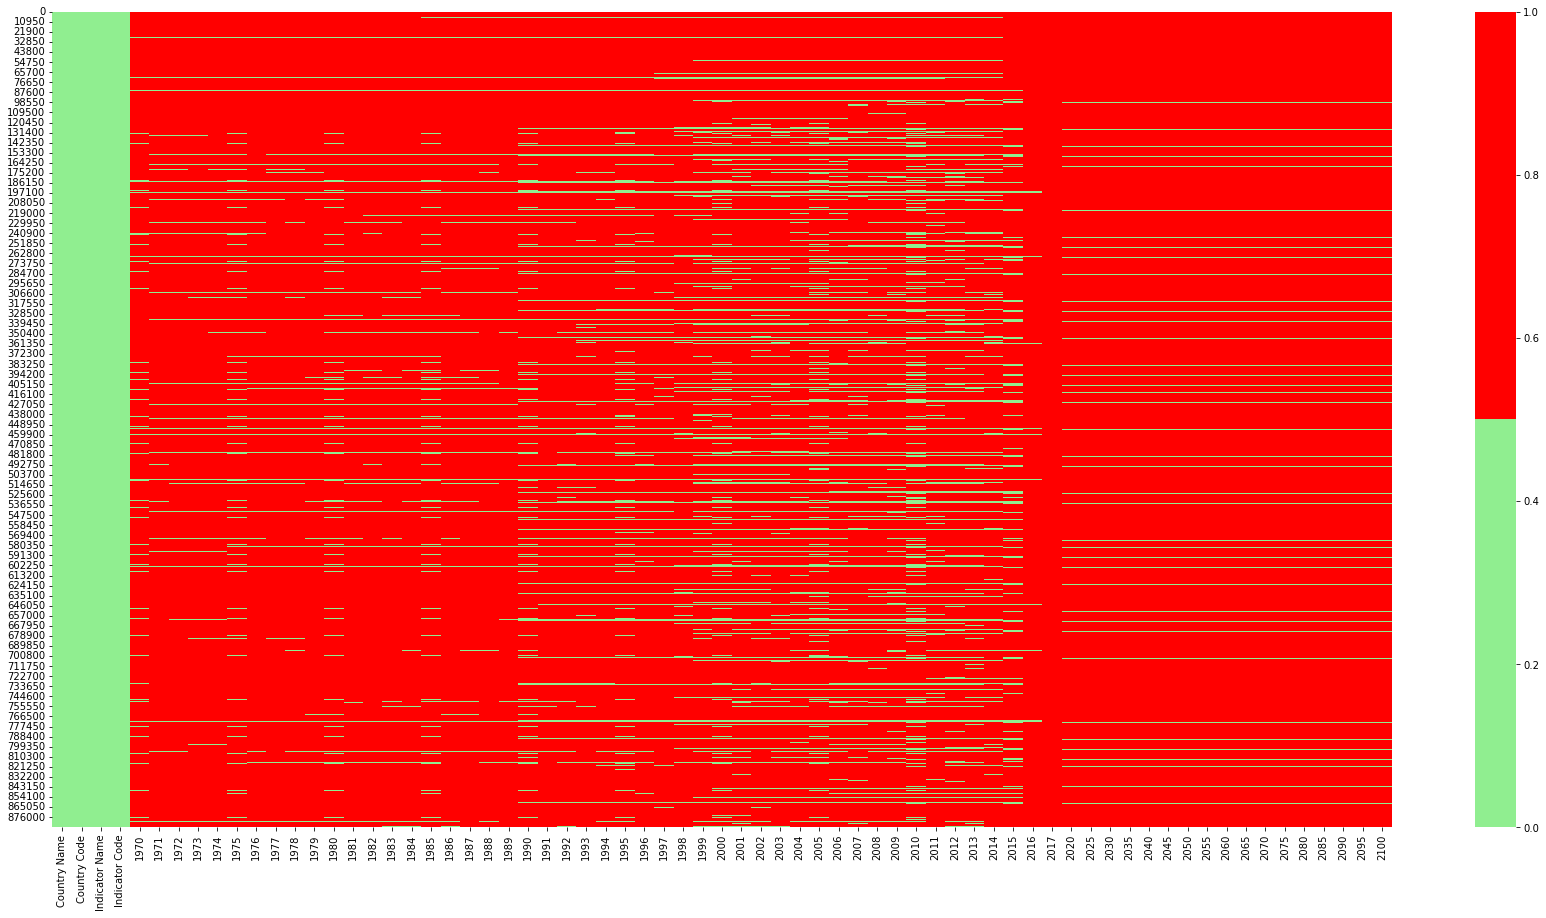

In [8]:
# Sélection des colonnes d'indice 0 à 69:
cols = df.columns[:69] 

# Mention des couleurs: vert complété, rouge manquant:
couleurs = ['lightgreen','red']

fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(couleurs), ax=ax)

> Poursuivons l'exploration des données du dataset principal, en visualisant le taux de valeurs manquantes, par colonnes.

In [9]:
# Pour obtenir cette vue, nous créons un DF temporaire dr qui fait abstraction, des 4 premières colonnes, totalement remplies:
dr = df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1)


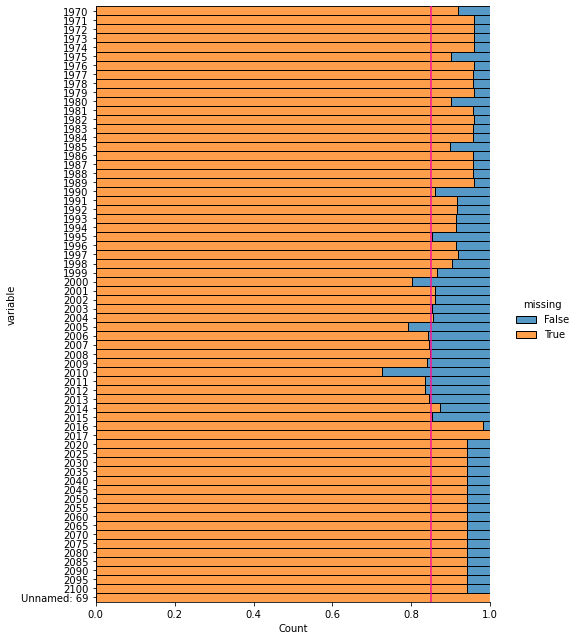

In [10]:
# Visualisation des valeurs manquantes pour chaque colonne (année):
sns.displot(
    dr.isna().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height= 9,
    aspect= 0.8
)

# Paramètres de la valeur de seuil (85% et filet rose):
plt.axvline(0.85, color='deeppink')

> 2014 mis à part, les années 2005 à 2015 présentent un taux de valeurs manquantes, inférieur ou égal à 85%.

> ## D - Gestion des valeurs manquantes: <a class="anchor" id="chapter4"></a>

In [11]:
# Fonction établissant, le taux de valeurs manquantes d'un dataframe df:

def txnul(df):
    ds = df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100
    print('Le taux de valeurs manquantes est de', round(ds,2),"%") 

In [12]:
# Mesure du taux de valeurs manquantes de df:

txnul(df)

Le taux de valeurs manquantes est de 86.1 %


In [13]:
# Codes pays uniques:

df['Country Code'].unique()

array(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC',
       'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC',
       'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'AFG', 'ALB',
       'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN',
       'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF',
       'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI',
       'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA',
       'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO',
       'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA',
       'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY',
       'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ',
       'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN',
       'KIR', 'PRK',

In [14]:
# Nombre de codes pays uniques dans df:

len(df['Country Code'].unique())

242

In [15]:
# Noms de pays uniques:

df['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


> 242 'pays' sont repertoriés, dans notre df.

In [16]:
# Comparons cela, à la source (EdStatsCountry):

pd.DataFrame(df['Country Name'].unique()).to_csv('lispays.csv')

# La source (EdStatsCountry) mentionne 241 pays, le df(EdStatsData) 242.
# Les zones pays sont à oter 

In [17]:
# Déclaration de la source et de lispayso, issus du fichier EdStatsCountry:

source = pd.read_csv("EdStatsCountry.csv",sep=',')
lipayso = source['Country Code']

In [18]:
# Liste des codes pays, issus du fichier EdStatsCountry:
lipayso

0      ABW
1      AFG
2      AGO
3      ALB
4      AND
      ... 
236    XKX
237    YEM
238    ZAF
239    ZMB
240    ZWE
Name: Country Code, Length: 241, dtype: object

In [19]:
# DF source issu du fichier EdStatsCountry:
source

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN


> ## E - Opérations de filtrage: <a class="anchor" id="chapter5"></a> 

> **Postulat**: Suite à notre visualisation exploratoire plus haut, nous ne conserverons que les valeurs de 2005 à 2015, bien que cette approche ne soit pas, la moins 'destructrice'.

In [20]:
# Déclaration de variables contenant, les colonnes utiles:

colut = ['Country Name','Country Code','Indicator Code','Indicator Name','2005','2006','2007',
          '2008','2009','2010','2011','2013','2012','2014','2015']

col_date = ['Country Name','Country Code','Indicator Code','Indicator Name', '2014','2015']

In [21]:
# Suppression de doublons:

df = df[df['Country Code'].isin(lipayso)][colut]
df

,Country Name,Country Code,Indicator Code,Indicator Name,2005,2006,2007,2008,2009,2010,2011,2013,2012,2014,2015
0,Arab World,ARB,UIS.NERA.2,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,UIS.NERA.2.F,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,UIS.NERA.2.GPI,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,UIS.NERA.2.M,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,SE.PRM.TENR,"Adjusted net enrolment rate, primary, both sex...",82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,85.51194,86.101669,85.320152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,UIS.LP.AG15T24.M,"Youth illiterate population, 15-24 years, male...",NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN
886926,Zimbabwe,ZWE,SE.ADT.1524.LT.ZS,"Youth literacy rate, population 15-24 years, b...",NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN
886927,Zimbabwe,ZWE,SE.ADT.1524.LT.FE.ZS,"Youth literacy rate, population 15-24 years, f...",NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN
886928,Zimbabwe,ZWE,SE.ADT.1524.LT.FM.ZS,"Youth literacy rate, population 15-24 years, g...",NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN


In [22]:
# Définition de l'array - lipays:

lipays = df['Country Code'].unique()
len(lipays)

241

In [23]:
lipays

array(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC',
       'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC',
       'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'AFG', 'ALB',
       'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR',
       'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD',
       'CHI', 'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV',
       'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM',
       'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FJI',
       'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR',
       'PRK', 'KOR',

In [24]:
# Suppression de lignes, sans valeur:

df = df.dropna(subset=['2014','2015'], how='any')
df

,Country Name,Country Code,Indicator Code,Indicator Name,2005,2006,2007,2008,2009,2010,2011,2013,2012,2014,2015
2483,Arab World,ARB,SP.POP.1564.TO.ZS,"Population, ages 15-64 (% of total)",6.041446e+01,6.090866e+01,6.137463e+01,6.179117e+01,6.213937e+01,6.240935e+01,6.250115e+01,6.251059e+01,6.252948e+01,6.247315e+01,6.243928e+01
4907,East Asia & Pacific,EAS,NY.GDP.MKTP.KD,GDP at market prices (constant 2005 US$),1.341779e+13,1.416183e+13,1.508230e+13,1.561056e+13,1.582121e+13,1.693876e+13,1.771876e+13,1.942585e+13,1.854448e+13,2.022557e+13,2.105782e+13
4908,East Asia & Pacific,EAS,NY.GDP.MKTP.CD,GDP at market prices (current US$),1.031134e+13,1.093973e+13,1.223700e+13,1.413406e+13,1.456452e+13,1.693876e+13,1.963867e+13,2.126254e+13,2.101913e+13,2.190003e+13,2.176695e+13
4909,East Asia & Pacific,EAS,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$),6.301071e+03,6.601498e+03,6.981153e+03,7.174526e+03,7.221621e+03,7.679834e+03,7.980136e+03,8.631591e+03,8.295707e+03,8.926072e+03,9.231014e+03
4910,East Asia & Pacific,EAS,NY.GDP.PCAP.CD,GDP per capita (current US$),4.842265e+03,5.099524e+03,5.664143e+03,6.495933e+03,6.648005e+03,7.679834e+03,8.844823e+03,9.447701e+03,9.402723e+03,9.665056e+03,9.541871e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886251,Zimbabwe,ZWE,SE.SEC.DURS,Theoretical duration of secondary education (y...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
886252,Zimbabwe,ZWE,SE.SEC.DURS.UP,Theoretical duration of upper secondary educat...,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
886611,Zimbabwe,ZWE,SL.UEM.TOTL.FE.ZS,"Unemployment, female (% of female labor force)",4.300000e+00,4.500000e+00,4.800000e+00,5.300000e+00,6.000000e+00,4.600000e+00,6.000000e+00,5.800000e+00,5.900000e+00,5.800000e+00,5.100000e+00
886612,Zimbabwe,ZWE,SL.UEM.TOTL.MA.ZS,"Unemployment, male (% of male labor force)",5.300000e+00,6.700000e+00,6.100000e+00,5.500000e+00,4.900000e+00,7.700000e+00,4.800000e+00,4.600000e+00,4.700000e+00,4.500000e+00,5.100000e+00


In [25]:
# Retrait de codes pays - zones ou inexistants (drop):

lisdrop =['ARB','ASM','CHI','EAP','EAS','ECA','ECS','EMU','EUU','FRA','HIC','HPC','IMN','KNA','LAC','LCA',
            'LIC','LMC','LMY','MIC','MNA','MNP','NAC','OED','PSE','SAS','SSA','SSF','TCA','UMC','WLD']

In [26]:
len(lisdrop)

31

In [27]:
# Liste des pays:

lipays= [e for e in lipays if e not in lisdrop]

In [28]:
# Nombre de pays restants:

len(lipays)

210

In [29]:
# Création du DF contenant uniquement, les pays: 

df = df[df['Country Code'].isin(lipays)][colut]

print("Il nous reste",len(df['Indicator Code'].unique()), "indicateurs")
print("et",len(df['Country Name'].unique()), "pays")

Il nous reste 937 indicateurs
et 209 pays


In [30]:
# Taux de valeurs manquantes du nouveau DF:
txnul(df)

Le taux de valeurs manquantes est de 4.54 %


> ## F - Choix des indicateurs: <a class="anchor" id="chapter6"></a>

In [31]:
# Composition d'une liste - malist - depuis 937 indicateurs:

listo = list(df['Indicator Code'].unique())
malist = []

# Conservation des indicateurs renseignés - pour 90% des pays, au minimum - pour peupler, malist:

malist=[]

for x in listo:
    a = len(df[df['Indicator Code']==x])/209
    if a> 0.90:
        z=list(x)
        malist.append(x)

In [32]:
# Longueur de ma liste d'indicateurs:

len(malist)

38

In [33]:
# Voici la liste de mes indicateurs:

malist

['NY.GDP.MKTP.KD',
 'NY.GDP.MKTP.CD',
 'NY.GDP.PCAP.KD',
 'NY.GDP.PCAP.CD',
 'IT.NET.USER.P2',
 'SH.DYN.MORT',
 'SP.POP.GROW',
 'SP.POP.0014.TO.ZS',
 'SP.POP.0014.FE.IN',
 'SP.POP.0014.MA.IN',
 'SP.POP.0014.TO',
 'SP.POP.1564.TO.ZS',
 'SP.POP.1564.FE.IN',
 'SP.POP.1564.MA.IN',
 'SP.POP.1564.TO',
 'SP.POP.TOTL.FE.IN',
 'SP.POP.TOTL.FE.ZS',
 'SP.POP.TOTL.MA.IN',
 'SP.POP.TOTL.MA.ZS',
 'SP.POP.TOTL',
 'SE.SEC.AGES',
 'UIS.THAGE.0',
 'SE.PRM.AGES',
 'UIS.THAGE.3.A.GPV',
 'SP.SEC.LTOT.IN',
 'SP.SEC.LTOT.FE.IN',
 'SP.SEC.LTOT.MA.IN',
 'SP.SEC.TOTL.IN',
 'SP.SEC.TOTL.FE.IN',
 'SP.SEC.TOTL.MA.IN',
 'SP.SEC.UTOT.IN',
 'SP.SEC.UTOT.FE.IN',
 'SP.SEC.UTOT.MA.IN',
 'SE.SEC.DURS.LO',
 'UIS.THDUR.0',
 'SE.PRM.DURS',
 'SE.SEC.DURS',
 'SE.SEC.DURS.UP']

In [34]:
# Sélection des indicateurs:

lindic =['NY.GDP.PCAP.CD','IT.NET.USER.P2','SP.POP.0014.TO','SP.POP.1524.TO.UN','SE.TER.ENRL']

In [35]:
# 'SE.TER.ENRL' Inscrits en enseignement supérieur - intégré 

In [36]:
# Génération d'un DF d'indicateurs retenus (dfir):

dfir = df[df['Indicator Code'].isin(lindic)][colut]
dfir

,Country Name,Country Code,Indicator Code,Indicator Name,2005,2006,2007,2008,2009,2010,2011,2013,2012,2014,2015
34230,Latin America & Caribbean,LCN,NY.GDP.PCAP.CD,GDP per capita (current US$),5.075129e+03,5.877232e+03,6.845832e+03,7.860104e+03,7.299813e+03,8.943388e+03,1.004794e+04,1.015881e+04,1.002581e+04,1.023742e+04,8.650872e+03
34360,Latin America & Caribbean,LCN,IT.NET.USER.P2,Internet users (per 100 people),1.662979e+01,2.075263e+01,2.370294e+01,2.650048e+01,3.103430e+01,3.470962e+01,3.934647e+01,4.626188e+01,4.318402e+01,4.876920e+01,5.427973e+01
35407,Latin America & Caribbean,LCN,SP.POP.0014.TO,"Population, ages 0-14, total",1.675821e+08,1.670707e+08,1.665499e+08,1.659983e+08,1.653916e+08,1.647319e+08,1.640804e+08,1.628173e+08,1.634499e+08,1.621473e+08,1.614297e+08
41560,Least developed countries: UN classification,LDC,NY.GDP.PCAP.CD,GDP per capita (current US$),4.261078e+02,4.884018e+02,5.814167e+02,7.059745e+02,7.029866e+02,7.798548e+02,8.645679e+02,9.495791e+02,8.964242e+02,1.004425e+03,9.690020e+02
41690,Least developed countries: UN classification,LDC,IT.NET.USER.P2,Internet users (per 100 people),7.839625e-01,1.117245e+00,1.922990e+00,2.122367e+00,2.705372e+00,4.271479e+00,4.799939e+00,7.538076e+00,6.060082e+00,1.046736e+01,1.302430e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882082,Zambia,ZMB,SP.POP.1524.TO.UN,"Population, ages 15-24, total",2.426399e+06,2.480394e+06,2.536697e+06,2.595464e+06,2.656713e+06,2.720387e+06,2.786411e+06,2.924614e+06,2.854607e+06,2.995938e+06,3.068044e+06
884510,Zimbabwe,ZWE,NY.GDP.PCAP.CD,GDP per capita (current US$),4.447605e+02,4.147962e+02,3.969982e+02,3.256786e+02,6.242722e+02,7.199795e+02,8.409499e+02,1.026388e+03,9.681639e+02,1.031105e+03,1.033416e+03
884640,Zimbabwe,ZWE,IT.NET.USER.P2,Internet users (per 100 people),2.400000e+00,2.400000e+00,3.000000e+00,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.550000e+01,1.200000e+01,1.636474e+01,2.274282e+01
885687,Zimbabwe,ZWE,SP.POP.0014.TO,"Population, ages 0-14, total",5.413043e+06,5.469367e+06,5.541073e+06,5.628349e+06,5.731077e+06,5.849140e+06,5.970883e+06,6.248747e+06,6.105032e+06,6.396521e+06,6.542997e+06


In [37]:
# Visualisation de mes indicateurs (fin de liste):

fg = dfir['Indicator Code']
fg.tail(30)

855320       IT.NET.USER.P2
856367       SP.POP.0014.TO
856427    SP.POP.1524.TO.UN
858855       NY.GDP.PCAP.CD
858985       IT.NET.USER.P2
860032       SP.POP.0014.TO
860092    SP.POP.1524.TO.UN
862650       IT.NET.USER.P2
863697       SP.POP.0014.TO
863757    SP.POP.1524.TO.UN
866144          SE.TER.ENRL
866185       NY.GDP.PCAP.CD
866315       IT.NET.USER.P2
867362       SP.POP.0014.TO
867422    SP.POP.1524.TO.UN
869850       NY.GDP.PCAP.CD
869980       IT.NET.USER.P2
871027       SP.POP.0014.TO
877180       NY.GDP.PCAP.CD
877310       IT.NET.USER.P2
878357       SP.POP.0014.TO
878417    SP.POP.1524.TO.UN
880845       NY.GDP.PCAP.CD
880975       IT.NET.USER.P2
882022       SP.POP.0014.TO
882082    SP.POP.1524.TO.UN
884510       NY.GDP.PCAP.CD
884640       IT.NET.USER.P2
885687       SP.POP.0014.TO
885747    SP.POP.1524.TO.UN
Name: Indicator Code, dtype: object

In [38]:
# Taux de valeurs manquantes du dfir:

txnul(dfir)

Le taux de valeurs manquantes est de 0.87 %


In [39]:
# Ce taux de valeurs manquantes, inférieur à 1% est convenable. 

In [40]:
# Visualisation de la distribution sur [2015] de quelques indicateurs:

<AxesSubplot:>

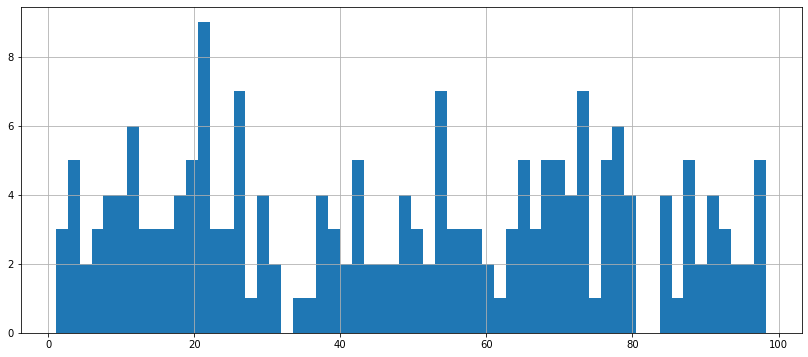

In [41]:
# Accès à l'internet:

internet = df[df['Indicator Code'] == 'IT.NET.USER.P2']
internet['2015'].hist(bins=60, figsize=[14,6])

<AxesSubplot:>

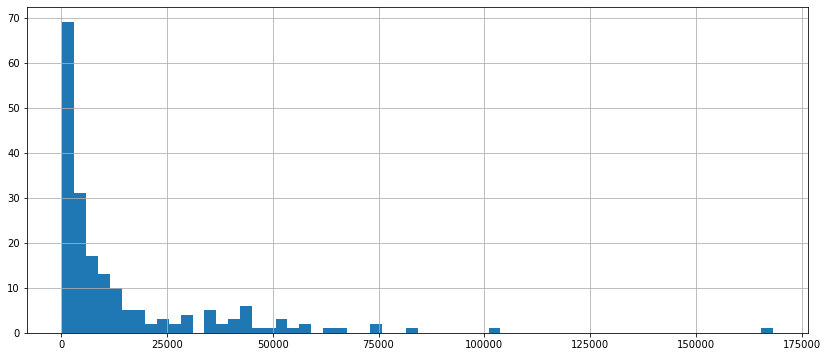

In [42]:
# PIB par habitant:

gdpc = df[df['Indicator Code'] == 'NY.GDP.PCAP.CD']
gdpc['2015'].hist(bins=60, figsize=[14,6])

<AxesSubplot:>

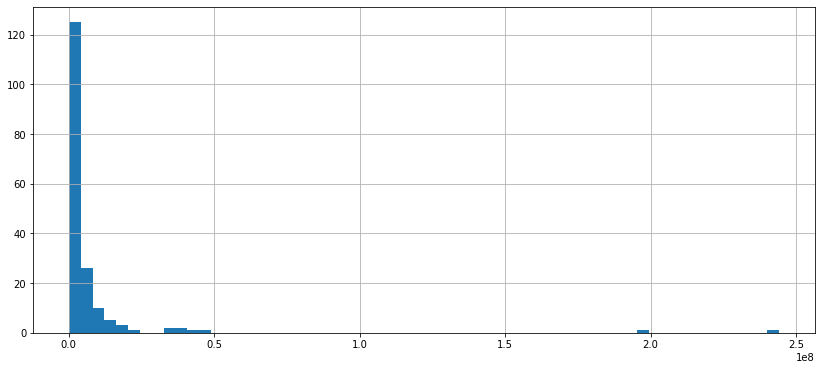

In [43]:
# Population 15-24 ans:

pop = df[df['Indicator Code'] == 'SP.POP.1524.TO.UN']
pop['2015'].hist(bins=60, figsize=[14,6])

In [44]:
pnc = dfir['Indicator Code'].value_counts()
pnc

IT.NET.USER.P2       200
NY.GDP.PCAP.CD       192
SP.POP.0014.TO       190
SP.POP.1524.TO.UN    178
SE.TER.ENRL           94
Name: Indicator Code, dtype: int64

In [45]:
#   Nous retenons, la sélection d'indicateurs suivants:

   **IT.NET.USER.P2**: Population ayant accès à l'internet (%)

   **NY.GDP.PCAP.CD**: PIB/habitant

   **SP.POP.0014.TO**: Population de moins de 14 ans

   **SP.POP.1524.TO.UN**: Population âgée de 15 à 24 ans

   **SE.TER.ENRL**: Population admise en enseignement supérieur

> ## G - Etude sur l'année 2015: <a class="anchor" id="chapter7"></a>

In [46]:
# Année la plus récente, par rapport à 2022 et dotée de données exploitables.

In [47]:
# Initialiasation d'un DF sur l'année 2015, exclusivement:

dfan = pd.crosstab(dfir["Country Name"],dfir['Indicator Code'],values=dfir['2015'],aggfunc=pd.Series.mean)
dfan.columns = [''.join(x) for x in dfan.columns.values]

# Ajout d'une colonne constituée de la population, âgée de moins de 24 ans:

dfan['Pop<24'] = dfan['SP.POP.0014.TO'] + dfan['SP.POP.1524.TO.UN']
dfan = dfan.drop(columns=['SP.POP.0014.TO','SP.POP.1524.TO.UN'])

# Pour davantage de lisibilité, nommons les 3 colonnes:

dfan = dfan.rename(columns={'IT.NET.USER.P2':'Internet','NY.GDP.PCAP.CD':'PIB/habitant','SE.TER.ENRL':'InsEnSup'})

# Les pays sans donnée, pour l'indicateur pop<24, sont supprimés:

dfan = dfan.dropna(subset='Pop<24',how='any')
dfan.interpolate(method ='linear', inplace=True)
dfan = dfan.dropna(how='any')
dfan

,Internet,PIB/habitant,InsEnSup,Pop<24
Country Name,,,,
Albania,63.252933,3934.895394,1.605270e+05,1075570.0
Algeria,38.200000,4160.220067,1.289474e+06,17892213.0
Angola,12.400000,3695.793748,8.955377e+05,17375597.0
Argentina,68.043064,13467.102357,5.016013e+05,17826043.0
Armenia,59.102378,3617.935746,1.076650e+05,1025814.0
...,...,...,...,...
"Venezuela, RB",61.869248,2456.423534,1.731885e+06,14263214.0
Vietnam,43.500000,2107.012927,2.466643e+06,38119826.0
"Yemen, Rep.",24.085409,1401.903319,2.466643e+06,16915867.0


Text(0.5, 1.0, 'Accès Internet (%) rapporté au PIB/habitant - 2015')

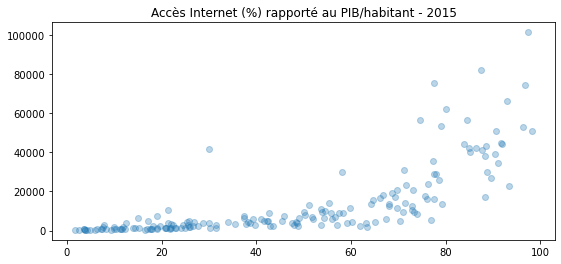

In [48]:
# Affichage type scatterplot:

fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(dfan['Internet'], dfan['PIB/habitant'], alpha= 0.3)
ax.set_title('Accès Internet (%) rapporté au PIB/habitant - 2015')

In [49]:
# Inscriptions en enseignement supérieur relativement au PNB/habitant:

Text(0.5, 0, 'Etudiants (millions)')

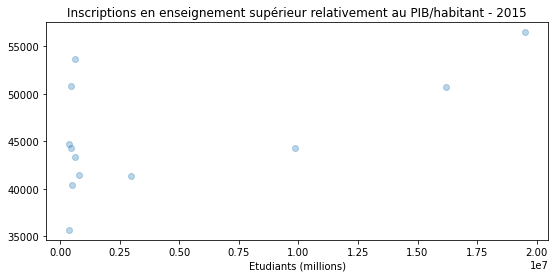

In [50]:
# Filtrons dans notre DF dfan (PIB/habitant supérieur à 35000 USD, inscriptions en enseignement supérieur supérieur à 350000 individus):

dfens = dfan[(dfan['PIB/habitant']>35000) & (dfan['InsEnSup']>350000)]

fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(dfens['InsEnSup'], dfens['PIB/habitant'], alpha=0.3)
ax.set_title('Inscriptions en enseignement supérieur relativement au PIB/habitant - 2015')
ax.set_xlabel('Etudiants (millions)')

Text(0, 0.5, 'pop < 25 ans - dizaine de millions')

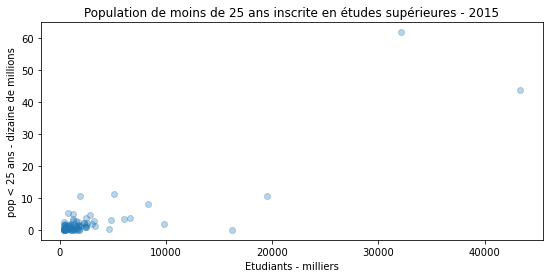

In [51]:
dfens = dfan[(dfan['InsEnSup']>350000)]

fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(dfens['InsEnSup']/1000, dfens['Pop<24']/10000000, alpha=0.3)
ax.set_title('Population de moins de 25 ans inscrite en études supérieures - 2015')
ax.set_xlabel('Etudiants - milliers')
ax.set_ylabel('pop < 25 ans - dizaine de millions')

Text(0, 0.5, 'Pop < 25 ans - en millions')

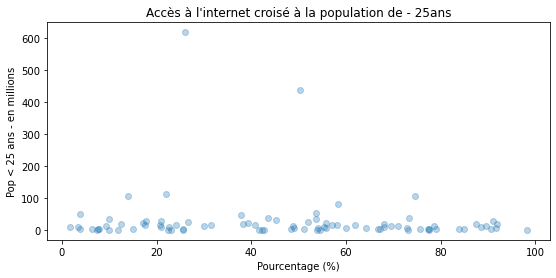

In [52]:
fig, ax = plt.subplots(figsize=(9,4))

ax.scatter(dfens['Internet'], dfens['Pop<24']/1000000, alpha=0.3)
ax.set_title("Accès à l'internet croisé à la population de - 25ans")
ax.set_xlabel('Pourcentage (%)')
ax.set_ylabel('Pop < 25 ans - en millions')

In [53]:
# Informations statistiques pour chaque variable: 

big = np.array([list(dfan.mean()), list(dfan.std()), list(dfan.median())])

sudf = pd.DataFrame(big,index=('means','std','median'),columns=[dfan.columns])
sudf

,Internet,PIB/habitant,InsEnSup,Pop<24
means,46.726387,13291.011586,1.497774e+06,1.744724e+07
std,28.069965,18483.634530,4.559057e+06,5.950228e+07
median,47.765692,4892.125226,3.418720e+05,3.455178e+06


In [54]:
# Création du DF dff, avec les filtres retenus (accès internet:74%, PIB/habitant>35000 USD, population de moins de 25 ans supérieure à 3,5 millions d'individus):

dff = dfan.loc[(dfan['Internet']>74) & (dfan['PIB/habitant']>35000) & (dfan['Pop<24']>3500000)]
dff

,Internet,PIB/habitant,InsEnSup,Pop<24
Country Name,,,,
Australia,84.560519,56554.038761,2.135688e+05,7395405.0
Canada,88.470000,43315.700442,5.979240e+05,10101375.0
Germany,87.589800,41323.921502,2.977781e+06,19398665.0
Israel,77.352090,35691.269165,3.740480e+05,3546229.0
Netherlands,91.724138,44746.334049,3.576991e+05,4844300.0
United Kingdom,92.000300,44305.554632,9.844170e+06,19184220.0
United States,74.554202,56469.008969,1.953173e+07,106800936.0


Text(0.5, 1.0, '% de la population ayant accès à Internet')

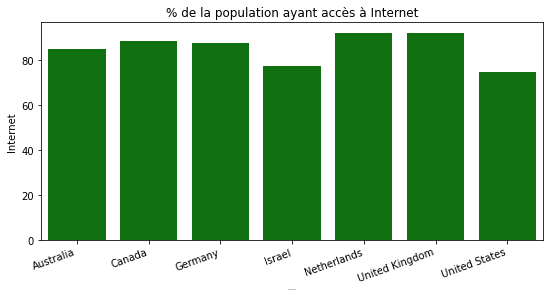

In [55]:
fig, ax = plt.subplots(figsize=(9,4))

ax.set_xlabel("",size=0)

sns.barplot(x = dff.index, y = 'Internet', data=dff, color = 'g')
plt.setp(ax.get_xticklabels(), rotation=20, ha="right")
plt.title("% de la population ayant accès à Internet")

Text(0.5, 1.0, 'Inscriptions en enseignement supérieur - en millons - 2015')

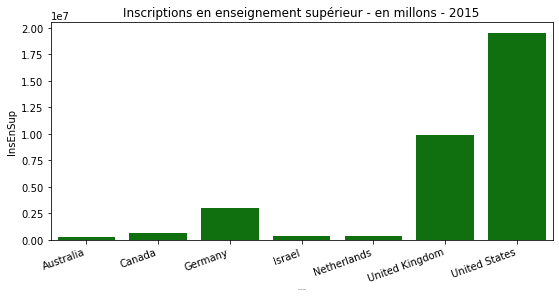

In [56]:
fig, ax = plt.subplots(figsize=(9,4))

ax.set_xlabel("",size=0)

sns.barplot(x = dff.index , y = 'InsEnSup', data=dff , color = 'g')
plt.setp(ax.get_xticklabels(), rotation=20, ha="right")
plt.title("Inscriptions en enseignement supérieur - en millons - 2015")

Text(0.5, 1.0, 'PIB/habitant - 2015')

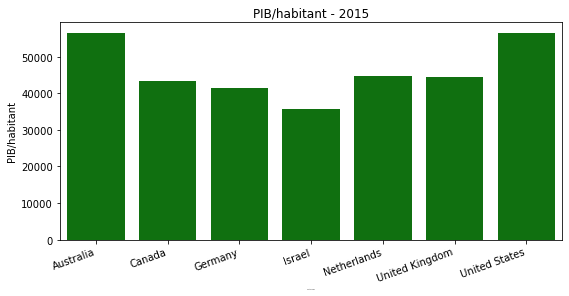

In [57]:
fig, ax = plt.subplots(figsize=(9,4))

ax.set_xlabel("",size=0)

sns.barplot(x = dff.index , y = 'PIB/habitant', data=dff , color = 'g')
plt.setp(ax.get_xticklabels(), rotation=20, ha="right")
plt.title("PIB/habitant - 2015")

Text(0.5, 1.0, 'population - en centaine de million - 25 ans')

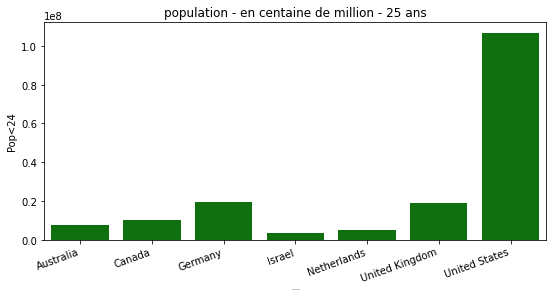

In [58]:
fig, ax = plt.subplots(figsize=(9,4))

ax.set_xlabel("",size=0)

sns.barplot(x = dff.index , y = 'Pop<24', data=dff , color = 'g')
plt.setp(ax.get_xticklabels(), rotation=20, ha="right")
plt.title("population - en centaine de million - 25 ans")

> ## H - Etude sur la période 2005-2015: <a class="anchor" id="chapter8"></a>

In [59]:
# Génération d'un DF pour suivre l'évolution des indicateurs, de 2005 à 2015:

lispays = list(dff.index)
lindic=['NY.GDP.PCAP.CD','IT.NET.USER.P2','SP.POP.1524.TO.UN','SE.TER.ENRR','SE.TER.ENRL']
tps = dfir[(dfir['Country Name'].isin(lispays)) & (dfir['Indicator Code'].isin(lindic))]
tps

,Country Name,Country Code,Indicator Code,Indicator Name,2005,2006,2007,2008,2009,2010,2011,2013,2012,2014,2015
129520,Australia,AUS,NY.GDP.PCAP.CD,GDP per capita (current US$),3.401671e+04,3.611828e+04,4.099198e+04,4.966469e+04,4.274300e+04,5.187408e+04,6.224510e+04,6.779230e+04,6.767763e+04,6.221461e+04,5.655404e+04
129650,Australia,AUS,IT.NET.USER.P2,Internet users (per 100 people),6.300000e+01,6.600000e+01,6.945000e+01,7.167000e+01,7.425000e+01,7.600000e+01,7.948770e+01,8.345350e+01,7.900000e+01,8.400000e+01,8.456052e+01
130757,Australia,AUS,SP.POP.1524.TO.UN,"Population, ages 15-24, total",2.808725e+06,2.841117e+06,2.867125e+06,2.887147e+06,2.902536e+06,2.914315e+06,2.922445e+06,2.926254e+06,2.926388e+06,2.922207e+06,2.914620e+06
221145,Canada,CAN,NY.GDP.PCAP.CD,GDP per capita (current US$),3.618959e+04,4.038670e+04,4.454453e+04,4.659634e+04,4.077345e+04,4.744748e+04,5.208221e+04,5.241372e+04,5.249669e+04,5.044043e+04,4.331570e+04
221275,Canada,CAN,IT.NET.USER.P2,Internet users (per 100 people),7.166000e+01,7.240000e+01,7.320000e+01,7.670000e+01,8.030000e+01,8.030000e+01,8.300000e+01,8.580000e+01,8.300000e+01,8.712000e+01,8.847000e+01
222382,Canada,CAN,SP.POP.1524.TO.UN,"Population, ages 15-24, total",4.339722e+06,4.382683e+06,4.423895e+06,4.459623e+06,4.485153e+06,4.497200e+06,4.494958e+06,4.452709e+06,4.479644e+06,4.416539e+06,4.373511e+06
356709,Germany,DEU,SE.TER.ENRL,"Enrolment in tertiary education, all programme...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.780013e+06,NaN,2.912204e+06,2.977781e+06
356750,Germany,DEU,NY.GDP.PCAP.CD,GDP per capita (current US$),3.469662e+04,3.644787e+04,4.181482e+04,4.569920e+04,4.173271e+04,4.178556e+04,4.681033e+04,4.653091e+04,4.406525e+04,4.804256e+04,4.132392e+04
356880,Germany,DEU,IT.NET.USER.P2,Internet users (per 100 people),6.871000e+01,7.216000e+01,7.516000e+01,7.800000e+01,7.900000e+01,8.200000e+01,8.127000e+01,8.417000e+01,8.235000e+01,8.619000e+01,8.758980e+01
357987,Germany,DEU,SP.POP.1524.TO.UN,"Population, ages 15-24, total",9.760730e+06,9.769678e+06,9.722427e+06,9.630837e+06,9.514498e+06,9.388651e+06,9.255162e+06,8.964066e+06,9.111578e+06,8.819364e+06,8.682394e+06


In [60]:
tps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 129520 to 849097
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    24 non-null     object 
 1   Country Code    24 non-null     object 
 2   Indicator Code  24 non-null     object 
 3   Indicator Name  24 non-null     object 
 4   2005            23 non-null     float64
 5   2006            23 non-null     float64
 6   2007            23 non-null     float64
 7   2008            23 non-null     float64
 8   2009            23 non-null     float64
 9   2010            23 non-null     float64
 10  2011            23 non-null     float64
 11  2013            24 non-null     float64
 12  2012            23 non-null     float64
 13  2014            24 non-null     float64
 14  2015            24 non-null     float64
dtypes: float64(11), object(4)
memory usage: 3.0+ KB


In [61]:
# Affichage - fonction de l'indicateur choisi - aff(ind):

def aff(ind):

    lispays
    tpl = tuple(np.arange(2005, 2016, 1))
    couleur = ('lime','silver','deeppink','gold','purple','teal','navy')
    titre = tps[tps['Indicator Code']==ind]['Indicator Name']
    titre = titre.iloc[0]

    plt.rcParams["figure.figsize"] = (9,4)
    fig, ax = plt.subplots()
    ax.set(title=titre)

    for p,c in zip(lispays,couleur) :
        h = tps[(tps['Indicator Code']==ind) & (tps['Country Name']==p)]
        h = h.iloc[:,4:]
        h = list(round(h.iloc[0]))
        a = plt.plot(tpl,h,color=c,alpha=0.5,label=p,ls='--')
        
    plt.legend(lispays)
    ax.set_xlim([2005,2018])

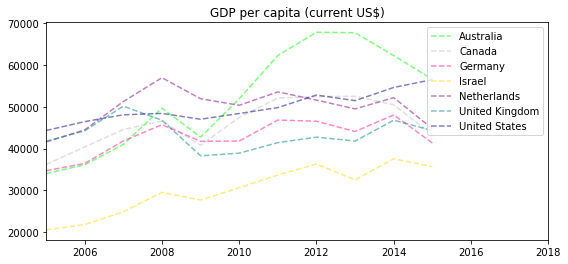

In [62]:
# PIB par habitant:

aff('NY.GDP.PCAP.CD')

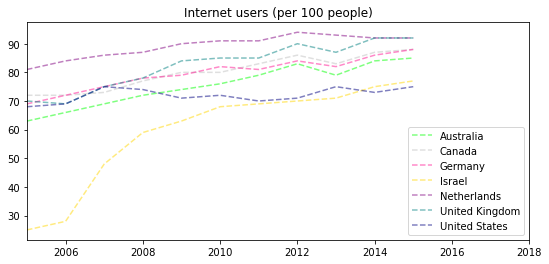

In [63]:
# Taux d'accès à l'internet:

aff('IT.NET.USER.P2')

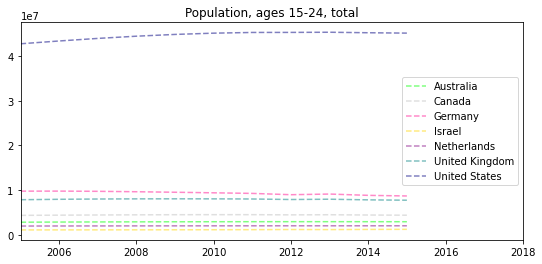

In [64]:
# Population totale des 15-24 ans:

aff('SP.POP.1524.TO.UN')

> ## I - Conclusion: <a class="anchor" id="chapter9"></a>

In [ ]:
# En reprenant le dff et en faisant un classement (de 1 à 7) de chaque pays, par variable:

# classement taux d'accès internet (taux le plus élevé vers le moins élevé)
# classement PIB/Habitant (PIB/habitant le plus élevé vers le moins élevé)
# classement inscriptions en enseignement supérieur (nb d'inscriptions le plus élevé vers le moins élevé)
# classement de la population de -24 ans (population la plus élevée vers la moins élevée)

# La somme des classements obtenus par pays, donne une somme totale.
# Nous classerons les pays en partant de la somme totale, la moins élevée:
    
#    1 - UK: 10 points
#    2 - USA: 11 points
#    3 - Germany: 15 points
        
# Ce sont les 3 pays de notre classement.     
